# Homework 3

## Pair Programming Group Number: 22
## Members of Team: Abe Mankavil

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [26]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests


In [27]:

req = requests.get('https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/')
content = req.content
csv_file = open('melb_data_sold_train.csv', 'wb')
csv_file.write(req.content)
csv_file.close()

req = requests.get('https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv')
content = req.content
csv_file = open('melb_data_sold_test.csv', 'wb')
csv_file.write(req.content)
csv_file.close()


In [28]:

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('melb_data_sold_train.csv')

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [29]:
df.dropna(axis=0, inplace=True)
df1 = df.reset_index(drop=True)

## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [30]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    diffLat = pt2[0] - pt1[0]
    diffLon = pt2[1] - pt1[1]

    #change to radians
    rdiffLat = np.deg2rad(diffLat)
    rdiffLon = np.deg2rad(diffLon)

    def hav(theta):
        return np.power(np.sin(theta/2),2)
    
    rad = 6371.0088

    h = np.sqrt(hav(rdiffLat) + (np.cos(np.deg2rad(pt2[0]))*np.cos(np.deg2rad(pt1[0]))*hav(rdiffLon)))

    d = 2*rad*np.arcsin(h)

    return d




In [31]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.24477251356973

In [32]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
def to_toorak(row):
    coord = np.array([row['Lattitude'], row['Longtitude']])
    return haversine_distance(coord, toorak_pt)
distance_to_toorak = df1.apply(to_toorak, axis=1)
df2 = pd.concat([df1, pd.DataFrame({'distance_to_toorak':distance_to_toorak})],axis=1)


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [33]:
_ = pd.get_dummies(df2['Type'], prefix='Type')
df3 = pd.concat([_, df2.drop(columns=['Type'], axis=1)], axis=1)

## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [34]:
df3.corr('pearson', numeric_only=True)


,Type_h,Type_t,Type_u,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Type_h,1.000000,-0.484749,-0.778062,0.501128,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
Type_t,-0.484749,1.000000,-0.172282,-0.040762,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
Type_u,-0.778062,-0.172282,1.000000,-0.535102,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
Rooms,0.501128,-0.040762,-0.535102,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
Price,0.391761,-0.095295,-0.372766,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,-0.040504,-0.008546,0.051754,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.484612,-0.037366,-0.518941,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.181773,0.108148,-0.282390,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.214175,-0.006836,-0.236298,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.047422,-0.067257,-0.005103,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [35]:
# Step one, build the matrix X
X = df3.select_dtypes(include='number').drop(columns=['Price'])
X




,Type_h,Type_t,Type_u,Rooms,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,1,0,0,2,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4.261612
1,1,0,0,3,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4.621843
2,1,0,0,2,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4.374206
3,1,0,0,2,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4.780655
4,0,0,1,2,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,-37.80780,144.99650,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1,0,0,3,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,-37.70425,144.93164,16.998846
3906,1,0,0,4,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,-37.70077,145.12743,18.491623
3907,0,1,0,3,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,-37.94775,145.02379,11.798784
3908,0,1,0,4,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,-37.94633,145.04947,11.986684


In [1]:
# Step two, build the column vector y
y = df3['Price']


NameError: name 'df3' is not defined

In [37]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond=None)
beta_hat



array([ 1.17577845e+07,  1.15678681e+07,  1.14252911e+07,  1.37519623e+05,
        6.35591132e+02,  2.57774471e+04,  2.03540724e+05,  5.44025948e+04,
        1.94402030e+01,  1.22151756e+03, -3.11155825e+03, -6.16718945e+05,
       -2.09209148e+05, -4.35776171e+04])

In [38]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 



668241.4294245676

In [39]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [40]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
df_test = pd.read_csv('melb_data_sold_test.csv')
df_test = df_test.fillna(value=df_test.mean(numeric_only=True))



In [41]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame

distance_to_toorak_test = df_test.apply(to_toorak, axis=1)
df_test = pd.concat([df_test, pd.DataFrame({'distance_to_toorak_test':distance_to_toorak_test})],axis=1)

_ = pd.get_dummies(df_test['Type'], prefix='Type')
df_test = pd.concat([_, df_test.drop(columns=['Type'], axis=1)], axis=1)



In [42]:
# Step two, build the attribute matrix Xdot 

Xdot = df_test.select_dtypes(include='number').drop(columns=['Price'])

In [43]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes

y_hat = np.matmul(Xdot, beta_hat)

In [44]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
err_vec = np.abs(y_hat-df_test['Price'])

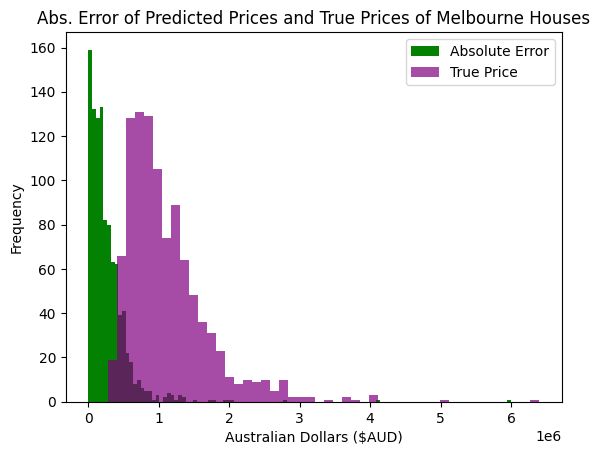

In [45]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
plt.hist(np.clip(err_vec, np.min(err_vec), 6e6), bins='fd', alpha=0.99, color='green', label='Absolute Error')
plt.hist(np.clip(df_test['Price'], np.min(df_test['Price']), np.max(df_test['Price'])), bins='fd', alpha=0.7, color='purple', label='True Price')
plt.legend()
plt.xlabel('Australian Dollars ($AUD)')
plt.ylabel('Frequency')
plt.title('Abs. Error of Predicted Prices and True Prices of Melbourne Houses')
plt.show()